## Quantum Simulations

In [1]:
## Libraries
import matplotlib.pyplot as plt
import numpy as np
from IPython.display import Image
from qutip import *
from math import sqrt
from scipy.stats import norm
import math
import cmath

In [2]:
# number of levels for each qubit
dim = 2

GHz = 1e9
ns = 1e-9

b = destroy(dim)                     # sigma minus operator
print(b)

Quantum object: dims = [[2], [2]], shape = (2, 2), type = oper, isherm = False
Qobj data =
[[0. 1.]
 [0. 0.]]


In [3]:
s0m = tensor(b, qeye(dim))           # sigma minus on 0
s0p = tensor(b.dag(), qeye(dim))     # sigma plus on 0
s1m = tensor(qeye(dim), b)           # sigma minus on 1
s1p = tensor(qeye(dim), b.dag())     # sigma plus on 1

print(s0m,s0p,s1m,s1p)

Quantum object: dims = [[2, 2], [2, 2]], shape = (4, 4), type = oper, isherm = False
Qobj data =
[[0. 0. 1. 0.]
 [0. 0. 0. 1.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]] Quantum object: dims = [[2, 2], [2, 2]], shape = (4, 4), type = oper, isherm = False
Qobj data =
[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [1. 0. 0. 0.]
 [0. 1. 0. 0.]] Quantum object: dims = [[2, 2], [2, 2]], shape = (4, 4), type = oper, isherm = False
Qobj data =
[[0. 1. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 1.]
 [0. 0. 0. 0.]] Quantum object: dims = [[2, 2], [2, 2]], shape = (4, 4), type = oper, isherm = False
Qobj data =
[[0. 0. 0. 0.]
 [1. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 1. 0.]]


In [7]:
check_m = 1j*b*np.exp(-1j)-1j*np.transpose(b*np.exp(1j))
print(check_m)

Quantum object: dims = [[2], [2]], shape = (2, 2), type = oper, isherm = True
Qobj data =
[[0.        +0.j         0.84147098+0.54030231j]
 [0.84147098-0.54030231j 0.        +0.j        ]]


AttributeError: module 'qutip' has no attribute 'check_herm'

In [4]:
omega = [2*np.pi*5.0*GHz, 2*np.pi*5.2*GHz]            # qubit transition frequencies [rad/s]
Delta = [2*np.pi*0*GHz,2*np.pi*0*GHz] #[-.33, -.33]   # anharmonicities [rad/s]
Omega = [2*np.pi*1*GHz, 2*np.pi*1*GHz]                # control-qubit drive strength [rad/s]
J = 2*np.pi*0*GHz #0.002                  # passive interaction [rad/s]

In [5]:
H0 = ( omega[0]*s0p*s0m + omega[1]*s1p*s1m ) + \
     (1/2)*( Delta[0]*s0p*s0p*s0m*s0m + Delta[1]*s1p*s1p*s1m*s1m ) + \
     J*(s0p*s1m+s0m*s1p)

print(H0)

Quantum object: dims = [[2, 2], [2, 2]], shape = (4, 4), type = oper, isherm = True
Qobj data =
[[0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 3.26725636e+10 0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 3.14159265e+10 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 6.40884901e+10]]


In [6]:
Hc0 = (s0m+s0p)
Hc1 = (s1m+s1p)

print(Hc0)
print(Hc1)

Quantum object: dims = [[2, 2], [2, 2]], shape = (4, 4), type = oper, isherm = True
Qobj data =
[[0. 0. 1. 0.]
 [0. 0. 0. 1.]
 [1. 0. 0. 0.]
 [0. 1. 0. 0.]]
Quantum object: dims = [[2, 2], [2, 2]], shape = (4, 4), type = oper, isherm = True
Qobj data =
[[0. 1. 0. 0.]
 [1. 0. 0. 0.]
 [0. 0. 0. 1.]
 [0. 0. 1. 0.]]


In [7]:
# Control on qubit 0
def D0(t, args):
    A = args['A0']
    w = args['w0']
    omega = args['omega0']
    return( A * ( float(t>=0 and t<=w) ) * np.exp(1j * omega * t) )

def D0dag(t,args):
    return np.conj(D0(t, args))

# Control on qubit 1
def D1(t, args):
    A = args['A1']
    w = args['w1']
    omega = args['omega1']
    # Gaussian pulse
    #return ( A * ( np.exp(-(1/2)*((t-35)/w)**2) + np.exp(-(1/2)*((t-235)/w)**2) ) * np.exp(-1j * omega*t) ) 
    # rectangular pulse
    #return( A * ( float(t>=0 and t<=w) + float(t>=100 and t<=w+100) ) * np.exp(-1j * omega*t) )
    return( A * ( float(t>=0 and t<=w) ) * np.exp(1j * omega * t))
    # simple drive
    #return( A * np.exp(-1j * omega*t) )
    
def D1dag(t,args):
    return np.conj(D1(t,args))

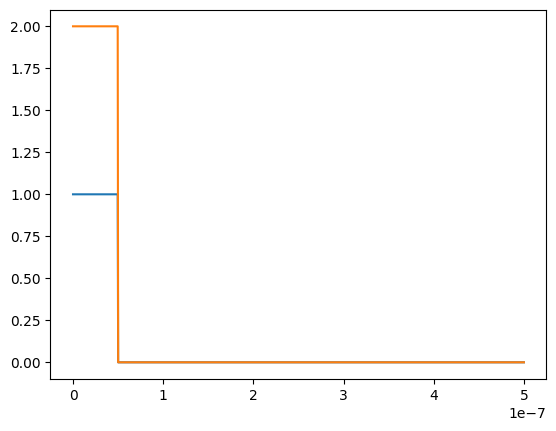

In [8]:
# plot pulse
# Simulate time range
t = np.linspace(0*ns,500*ns,1000)
plt.plot(t, [abs(D1(ti,{'A1':1,'w1':50*ns,'omega1':omega[1]})) for ti in t])
plt.plot(t, [abs(D0(ti,{'A0':2,'w0':50*ns,'omega0':omega[0]})) for ti in t])
plt.show()

In [9]:
# Total Hamiltonain
#H = [H0, [Hc0,D0], [Hc1,D1]]
H = [H0, [s0m,D0], [s0p,D0dag], [s1m,D1], [s1p,D1dag]]
print(H)

[Quantum object: dims = [[2, 2], [2, 2]], shape = (4, 4), type = oper, isherm = True
Qobj data =
[[0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 3.26725636e+10 0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 3.14159265e+10 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 6.40884901e+10]], [Quantum object: dims = [[2, 2], [2, 2]], shape = (4, 4), type = oper, isherm = False
Qobj data =
[[0. 0. 1. 0.]
 [0. 0. 0. 1.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]], <function D0 at 0x0000029134185EE0>], [Quantum object: dims = [[2, 2], [2, 2]], shape = (4, 4), type = oper, isherm = False
Qobj data =
[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [1. 0. 0. 0.]
 [0. 1. 0. 0.]], <function D0dag at 0x0000029134185A60>], [Quantum object: dims = [[2, 2], [2, 2]], shape = (4, 4), type = oper, isherm = False
Qobj data =
[[0. 1. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 1.]
 [0. 0. 0. 0.]], <function D1 at 0x0000029172E3C550>], [Quantum object: dims = [[2, 2], [2, 2]], shape = (4

In [10]:
# Initial State |00>
psi0 = tensor(basis(dim,0),basis(dim,0))   
print(psi0)

dm0 = psi0 * psi0.dag()
print(dm0)

Quantum object: dims = [[2, 2], [1, 1]], shape = (4, 1), type = ket
Qobj data =
[[1.]
 [0.]
 [0.]
 [0.]]
Quantum object: dims = [[2, 2], [2, 2]], shape = (4, 4), type = oper, isherm = True
Qobj data =
[[1. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]


In [11]:
# Projectors on basis
P00 = tensor(basis(dim,0),basis(dim,0)) * tensor(basis(dim,0),basis(dim,0)).dag()
P01 = tensor(basis(dim,0),basis(dim,1)) * tensor(basis(dim,0),basis(dim,1)).dag()
P10 = tensor(basis(dim,1),basis(dim,0)) * tensor(basis(dim,1),basis(dim,0)).dag()
P11 = tensor(basis(dim,1),basis(dim,1)) * tensor(basis(dim,1),basis(dim,1)).dag()

print(P00,P01,P10,P11)

Quantum object: dims = [[2, 2], [2, 2]], shape = (4, 4), type = oper, isherm = True
Qobj data =
[[1. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]] Quantum object: dims = [[2, 2], [2, 2]], shape = (4, 4), type = oper, isherm = True
Qobj data =
[[0. 0. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]] Quantum object: dims = [[2, 2], [2, 2]], shape = (4, 4), type = oper, isherm = True
Qobj data =
[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 0. 0.]] Quantum object: dims = [[2, 2], [2, 2]], shape = (4, 4), type = oper, isherm = True
Qobj data =
[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 1.]]


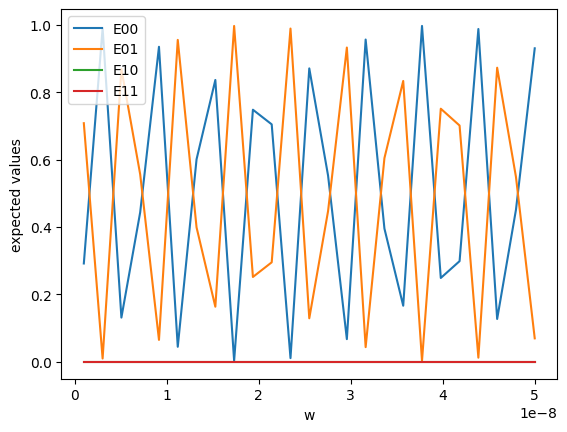

In [14]:
# For recording the expected values for different w
E00 = []
E01 = []
E10 = []
E11 = []

# For rectanglar pulse, fix amplitude A=1, vary w
w_range = np.linspace(1*ns,50*ns,25)
A_range = np.linspace(0,1,100)
A = 10**9
w = 1*ns

for w in w_range:
    # simulate the evolution under the pulse
    output = mesolve(H,                          # total Hamiltonian
                     dm0,                        # initial density matrix
                     t,                          # simulation time step
                     [],                         # collapse operator
                     [P00,P01,P10,P11],                  # observables
                     args={'omega0': omega[0],   # input arguements for the control functions
                           'A0':0, 
                           'w0':1*ns, 
                           'omega1': omega[1], 
                           'A1':A, 
                           'w1':w}, 
                     options=Options(nsteps=5000))
    
    # plt.plot(t,output.expect[0])
    # plt.plot(t,output.expect[1])
    # plt.xlabel("t")
    # plt.ylabel("expected values")
    # plt.legend(['E00','E01'])
    # plt.title("A={},w={}".format(str(A),str(w)))
    # plt.show()
    #record the expected values from the final time step
    E00.append(output.expect[0][-1])
    E01.append(output.expect[1][-1])
    E10.append(output.expect[2][-1])
    E11.append(output.expect[3][-1])
    
# plot result
plt.plot(w_range, E00)
plt.plot(w_range, E01)
plt.plot(w_range, E10)
plt.plot(w_range, E11)
plt.legend(['E00','E01','E10','E11'])
plt.xlabel('w')
plt.ylabel('expected values')
#plt.title("A={}".format(str(A)))
plt.show()

In [50]:
output.states[100]

Quantum object: dims = [[2, 2], [2, 2]], shape = (4, 4), type = oper, isherm = True
Qobj data =
[[ 1.02342915e+00-1.08256111e-06j  2.34975442e-03-2.04173679e-04j
   0.00000000e+00+0.00000000e+00j  0.00000000e+00+0.00000000e+00j]
 [-1.00369265e+01-8.67182397e-01j -2.34291455e-02+1.08256111e-06j
   0.00000000e+00+0.00000000e+00j  0.00000000e+00+0.00000000e+00j]
 [ 0.00000000e+00+0.00000000e+00j  0.00000000e+00+0.00000000e+00j
   0.00000000e+00+0.00000000e+00j  0.00000000e+00+0.00000000e+00j]
 [ 0.00000000e+00+0.00000000e+00j  0.00000000e+00+0.00000000e+00j
   0.00000000e+00+0.00000000e+00j  0.00000000e+00+0.00000000e+00j]]

In [51]:
(output.states[100]*P00).tr()

(1.0234291455373261-1.0825611095297584e-06j)

In [87]:
output = mesolve(H,                          # total Hamiltonian
                P00,                        # initial density matrix
                t,                          # simulation time step
                [],                         # collapse operator
                [P00,P01,P10,P11],                  # observables
                args={'omega0': omega[0],   # input arguements for the control functions
                      'A0':0, 
                      'w0':1*ns, 
                      'omega1': omega[1], 
                      'A1':1000000000,                            
                      'w1':10*ns}, 
                options=Options(nsteps=5000))

In [88]:
output.expect[0][100]

1.0234291455373261

In [89]:
output = sesolve(H,                          # total Hamiltonian
                psi0,                        # initial density matrix
                t,                          # simulation time step
                [tensor(psi0) * tensor(psi0).dag()],                  # observables
                args={'omega0': omega[0],   # input arguements for the control functions
                      'A0':0, 
                      'w0':1*ns, 
                      'omega1': omega[1], 
                      'A1':1000000000,                            
                      'w1':10*ns}, 
                options=Options(nsteps=5000))

In [90]:
output.expect[0][100]

0.010143161107179256

## Wiener Process (Measurement)

In [18]:
def brownian(x0, n, dt, delta, out=None):
    """
    Generate an instance of Brownian motion (i.e. the Wiener process):

        X(t) = X(0) + N(0, delta**2 * t; 0, t)

    where N(a,b; t0, t1) is a normally distributed random variable with mean a and
    variance b.  The parameters t0 and t1 make explicit the statistical
    independence of N on different time intervals; that is, if [t0, t1) and
    [t2, t3) are disjoint intervals, then N(a, b; t0, t1) and N(a, b; t2, t3)
    are independent.
    
    Written as an iteration scheme,

        X(t + dt) = X(t) + N(0, delta**2 * dt; t, t+dt)


    If `x0` is an array (or array-like), each value in `x0` is treated as
    an initial condition, and the value returned is a numpy array with one
    more dimension than `x0`.

    Arguments
    ---------
    x0 : float or numpy array (or something that can be converted to a numpy array
         using numpy.asarray(x0)).
        The initial condition(s) (i.e. position(s)) of the Brownian motion.
    n : int
        The number of steps to take.
    dt : float
        The time step.
    delta : float
        delta determines the "speed" of the Brownian motion.  The random variable
        of the position at time t, X(t), has a normal distribution whose mean is
        the position at time t=0 and whose variance is delta**2*t.
    out : numpy array or None
        If `out` is not None, it specifies the array in which to put the
        result.  If `out` is None, a new numpy array is created and returned.

    Returns
    -------
    A numpy array of floats with shape `x0.shape + (n,)`.
    
    Note that the initial value `x0` is not included in the returned array.
    """

    x0 = np.asarray(x0)

    # For each element of x0, generate a sample of n numbers from a
    # normal distribution.
    r = norm.rvs(size=x0.shape + (n,), scale=delta*sqrt(dt))

    # If `out` was not given, create an output array.
    if out is None:
        out = np.empty(r.shape)

    # This computes the Brownian motion by forming the cumulative sum of
    # the random samples. 
    np.cumsum(r, axis=-1, out=out)

    # Add the initial condition.
    out += np.expand_dims(x0, axis=-1)

    return out

In [19]:
## physical constants
var_hbar = 1.054571817*10**(-34) # Units of J.Hz^(-1)
var_m = 9.1093837*10**(-31) # Electron mass, Units of kg
var_m_N = 1.6735575*10**(-27) # Nucleon mass, units of kg
var_L = 100*1e-8 # length of box, in meters
var_time_end = 1 # simulation time, in seconds
var_freq = 10**15 # frequency in Hz
var_omega = 2*math.pi*var_freq
var_c = 3*10**8 # speed of light (m/s)
var_p_x = var_omega/var_c # photon momentum along x-axis
var_epsilon0 = 8.8541878128*10**-12 # vacuum permittivity in SI units
var_e = 1.60217663*10**-19 # electron charge in Coulombs
var_r_c = 10**-7 # localization radius in meters (as per Adler)
var_lammda = 2.2*10**-17 # Standard CSL lambda value, units in s^(-1)
var_gamma = 8*(math.pi**1.5)*(var_r_c**3)*var_lammda
var_delta = 1 # Wiener Process parameter

## model discretization
x_step = 10**2 # number of intervals used to discretize space.
time_step = int(0.5788381803480310 * 10**6) # number of intervals used to discretize time.

delta_x = var_L/x_step # dx
delta_t = min((1 / np.abs(var_hbar / (2 * var_m * delta_x**2))), var_time_end / time_step) # dt
var_time_end = delta_t * time_step

print("T_end = %.3f us" %(var_time_end * 10**6))

x_range = np.linspace(0, var_L, x_step+1) # discretized space array
time_range = np.linspace(0, var_time_end, time_step+1) # discretized time array

T_end = 1.000 us


Shape of brownian_steps: (101, 578839)
brownian_steps: [[ 0.00000000e+00  1.13806765e-06  8.99825692e-07 ... -3.36184853e-04
  -3.33155502e-04 -3.30834478e-04]
 [ 1.00000000e-08 -5.02452809e-07 -1.67393951e-08 ... -7.02135987e-04
  -7.01205080e-04 -7.00879562e-04]
 [ 2.00000000e-08  2.06921205e-06  2.78641098e-06 ...  3.15856150e-05
   3.11998871e-05  3.16220658e-05]
 ...
 [ 9.80000000e-07  1.55419706e-06  1.03035007e-06 ... -2.01685528e-04
  -2.02541204e-04 -2.01170626e-04]
 [ 9.90000000e-07  1.88210507e-06  1.73054609e-06 ... -1.83114529e-04
  -1.83883850e-04 -1.83911691e-04]
 [ 1.00000000e-06  5.93055971e-07 -1.07774507e-06 ...  1.54979813e-03
   1.54914579e-03  1.54781500e-03]]


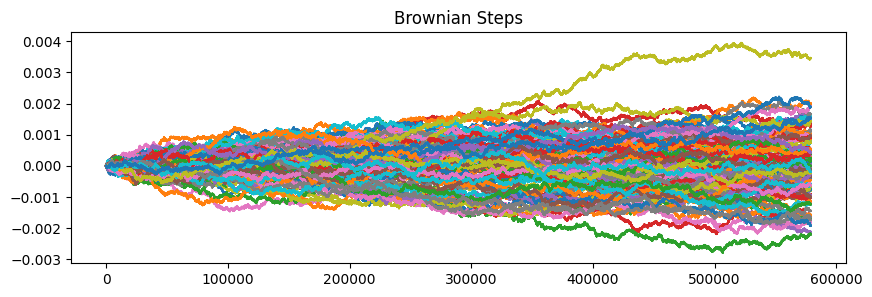

In [22]:
## Brownian Motion
# brownian_steps = np.empty((len(x_range),time_step+1)) # Matrix for time-evolution of brownian process for each position in discretized space
# brownian_steps[:, 0] = np.transpose(x_range)
# brownian(brownian_steps[:,0], time_step, delta_t, var_delta, out=brownian_steps[:,1:])

brownian_steps = brownian(x_range, time_step, delta_t, var_delta)
brownian_steps = np.insert(brownian_steps, 0, x_range, axis=1)

print("Shape of brownian_steps:", brownian_steps.shape)
print("brownian_steps:", brownian_steps)

plt.figure(figsize = (10,3))
for i in range(len(x_range)):
    plt.plot(np.arange(time_step+1), brownian_steps[i,:])
plt.title("Brownian Steps")
plt.show()